# **Семинар 8-9. Корреляция. Линейная регрессия**

## Корреляция

### Свойства корреляции

**Корреляция** - степень линейной взаимосвязи между двумя величинами

1. Изменяется от -1 до 1
2. Положительный коэффициент корреляции свидетельствует о прямой зависимости
3. Отрицательный коэффициент корреляции свидетельствует об обратной зависимости
4. Если корреляция 0 (близка к 0), то между признаками отсутствует линейная зависимость


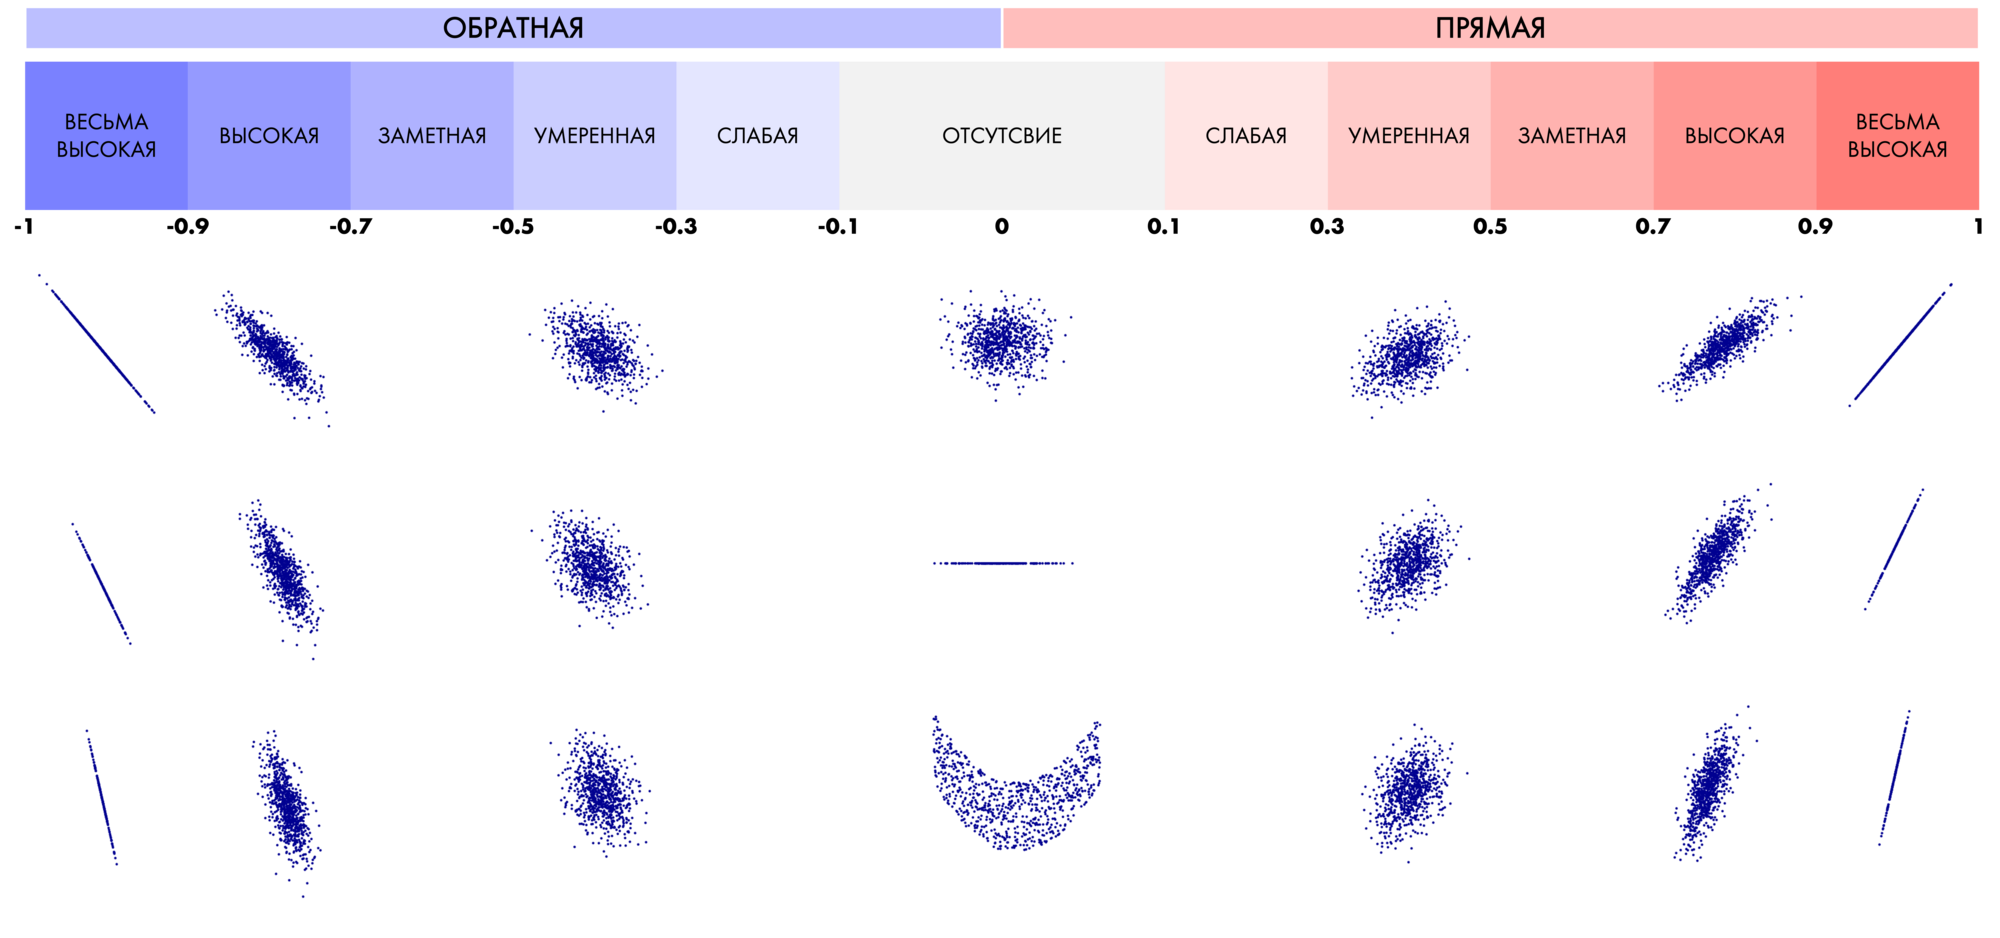

**ОБРАТНАЯ ЛИНЕЙНАЯ ЗАВИСИМОСТЬ**
- $corr<0$
- При **увеличении** одного показателя другой будет **снижаться**

**ОТСУТСТВИЕ ЛИНЕЙНОЙ ЗАВИСИМОСТИ**
- $corr=0$
- Между признаками отсутвует линейная взаимосвязь

**ПРЯМАЯ ЛИНЕЙНАЯ ЗАВИСИМОСТЬ**
- $corr>0$
- При **увеличении** одного показателя другой будет **увеличиваться**
- При **снижении** одного показателя другой будет **снижаться**



**ВАЖНО!**
1. Корреляция **не подразумевает причинно-следственной связи**. Если между признаками А и Б есть тесная взаимосвязь, то мы **НЕ** можем говорить, что А **влияет** на Б или Б **влияет** на А.
2. Корреляция **чувствительны к выбросам**
3. Коэффициент корреляции Пирсона **НЕ фиксирует нелинейные отношения** между двумя переменными.

### A8

Экономист Степан хочет понять, как годовой валовый внутренний продукт (ВВП) некоторой страны зависит от среднего годового уровня безработицы (УБ) этой страны (обе величины являются непрерывными). Оказалось, что выборочный коэффициент корреляции между ВВП и УБ равен -0.12. Выберите все верные утверждения.

Выберите один или несколько ответов:

+ Между переменными ВВП и УБ существует отрицательная слабовыраженная линейная взаимосвязь.


+ Рассматривая только коэффициент корреляции, нельзя однозначно определить, существует ли причинно-следственная связь между ВВП и УБ.


+ Между переменными ВВП и УБ не существует положительной нелинейной связи.


+ ВВП и УБ являются независимыми величинами.

### А9

Укажите между какими признаками самая сильная обратная корреляция.

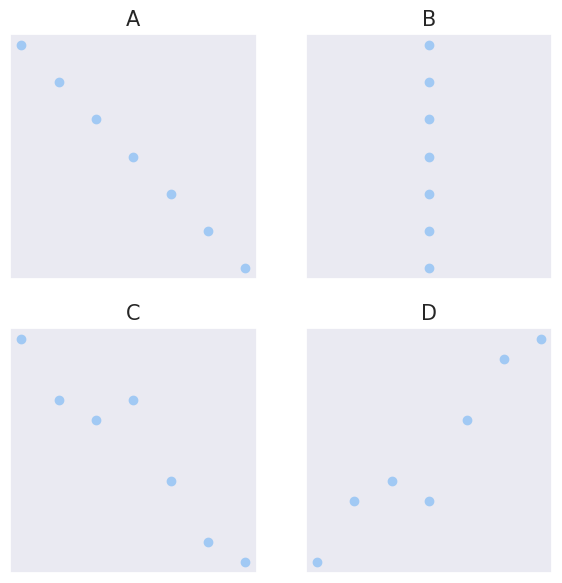

### Данные для анализа

Данные по автомобилям:

**Car_Name** - название автомобиля

**Selling_Price** - цена покупки автомобиля (в млн. рублей)

**Present_Price** - текущая цена автомобиля (в млн. рублей)

**Owner** - наличие предыдущих владельцев (1 - были/0 - нет)

**Kms_Driven** - пробег

**Age** - возраст автомобиля (в годах)

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/prvshnat/hsedata2425/refs/heads/main/cars.csv')
df.head()

,Car_Name,Selling_Price,Present_Price,Owner,Kms_Driven,Age
0,ritz,3.35,5.59,0,27000,10
1,sx4,4.75,9.54,0,43000,11
2,ciaz,7.25,9.85,0,6900,7
3,wagon r,2.85,4.15,0,5200,13
4,swift,4.60,6.87,0,42450,10


### Рассчет коэффицента корреляции `.corr()`

**Коэффициент корреляции Пирсона** позволяет оценить силу и направление линейной взаимосвязи между **ЧИСЛОВЫМИ ДАННЫМИ**


**ПАРНАЯ КОРРЕЛЯЦИЯ**

``` python
датафрейм['колонка 1'].corr(датафрейм['колонка 2'])
```

In [2]:
df['Selling_Price'].corr(df['Present_Price']) #если поменять местами ответ не изменится

0.8789825451614949

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

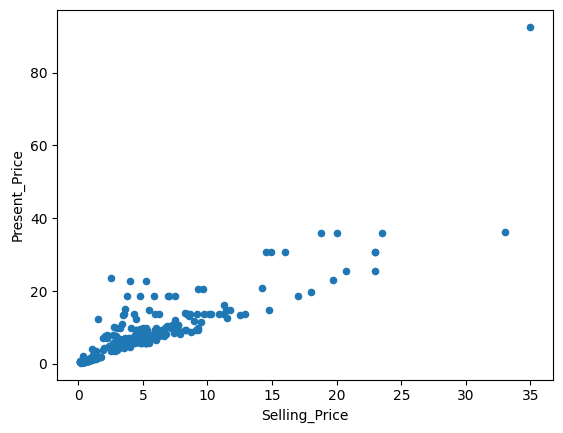

In [3]:
df.plot('Selling_Price', 'Present_Price', kind = "scatter")

+ Между признаками существует высокая прямая линейная зависимость
+ При увеличении цены покупки (**Selling_Price**), текущая цена (**Present_Price**) скорее всего тоже увеличится
+ При снижении цены покупки (**Selling_Price**), текущая цена (**Present_Price**) скорее всего тоже увеличится

**КОРРЕЛЯЦИОННАЯ МАТРИЦА**

``` python
датафрейм.corr()
```

или

``` python
датафрейм.corr(numeric_only = True)
```

In [4]:
df.corr(numeric_only = True)

,Selling_Price,Present_Price,Owner,Kms_Driven,Age
Selling_Price,1.000000,0.878983,-0.101445,0.029187,-0.236141
Present_Price,0.878983,1.000000,-0.055443,0.203647,0.047584
Owner,-0.101445,-0.055443,1.000000,0.021857,0.146629
Kms_Driven,0.029187,0.203647,0.021857,1.000000,0.524342
Age,-0.236141,0.047584,0.146629,0.524342,1.000000


+ По центральной диагонали 1 (автокорреляция)
+ Симметрична относительна центальной диагонали

## Линейная регрессия

### Термины регрессия

**Линейная регрессия** — модель зависимости одной (целевой переменной) переменной от другой или нескольких других переменных (независимых переменных)

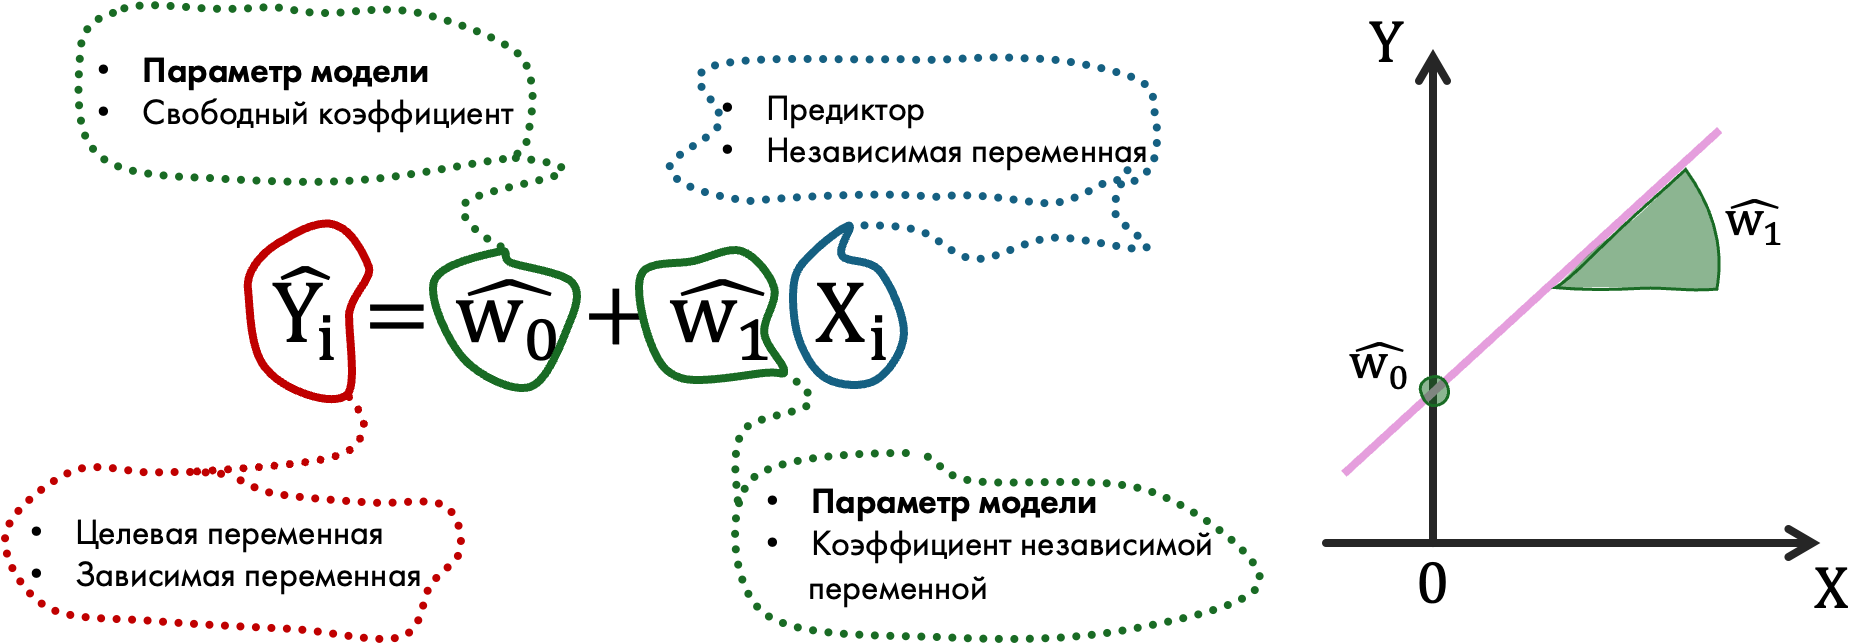

+ **Целевая переменная** - количественная
+ **Независимая переменная** - количественная или категориальная

**Виды регрессий:**

Однофакторная

$$ Y = w_0+w_1*X $$


Многофакторная

$$ Y = w_0+w_1*X_1 + w_2* X_2 +...+w_n*X_n $$

### A10

Была построена модель, которая предсказывает, как расстояние до метро влияет на стоимость квартиры:

$$Цена=\text{Расстояние до метро}*a + b$$


Соотнесите термины регрессии и составляющие модели:

| Составляющие | Термины |
|----------|----------|
| **Квартира**   | Свободный коэффициент   |
| **Цена**    | Наблюдение   |
| **Расстояние до метро**    | Зависимая переменная   |
| **a**   | Независимая переменная   |
| **b**   | Коэффициент независимой переменной   |

### Данные для анализа

Данные по ресторанам:



**Number_of_Customers**	- среднее количество посетителей за день

**Menu_Price** - средняя цена блюда ($)

**Marketing_Spend**	- затраты на рекламу

**Cuisine_Type** - кухня

**Average_Customer_Spending** - затраты на привлечение клиента ($)

**Promotions** - проводились ли рекламные акции (0/1)

**Reviews** - количество отзывов на ресторан

**Monthly_Revenue** - месячная прибыль ресторана ($)

In [5]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/prvshnat/hsedata2425/refs/heads/main/Restaurants.csv')
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


Перед тем как строить модель, данные нужно подготовить: очистить от выбросов, заменить пропуски, перекодировать категориальные данные цифрами. Но у нас данные уже подготовленные.

### Обучение модели

**Обучить модель** - найти значение параметров модели

Обучение линейной регрессии происходит с помощью **Метода наименьших квадратов** (МНК, OLS)

Суть метода состоит в том, чтобы минизировать расстояние от каждого наблюдения, до нашей модели.

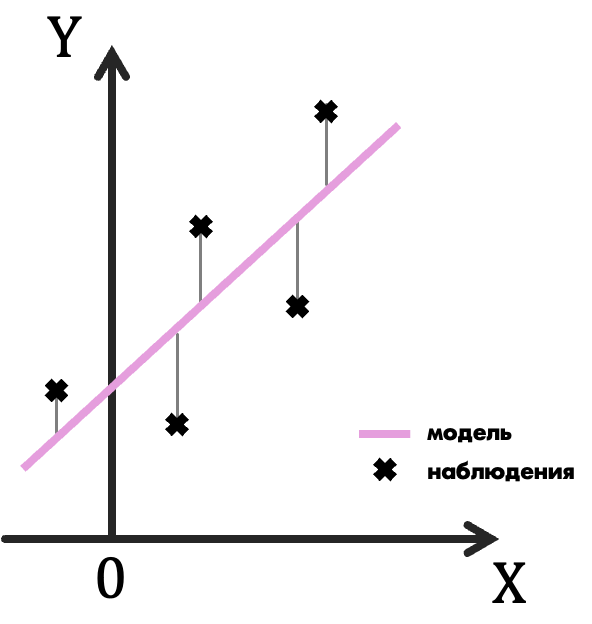

```
import statsmodels.api as sm

X = sm.add_constant(предиктор/ы)
Y = целевая                        
модель = sm.OLS(Y, X).fit()

```

`sm.add_constant` добавляет столбец с 1, для правильного рассчета параметров

Мы хотим построить модель, которая показывает как количество посетителей (**Number_of_Customers**) и проведение рекламных акций (**Promotions**) оказывает влияение на прибыль ресторана (**Monthly_Revenue**)

$$ \text{Monthly_Revenue} = w_0 + w_1*\text{Number_of_Customers} + w_2*\text{Promotions} $$

In [6]:
import statsmodels.api as sm

X = sm.add_constant(df[['Number_of_Customers', 'Promotions']])  # предиктор/независимая переменная
Y = df['Monthly_Revenue']                                       # целевая переменная/зависимая переменная
model = sm.OLS(Y, X).fit()                                      # обучаем модель (находим параметры w)

### Параметры модели

```
модель.params

```

$$ \text{Monthly_Revenue} = 114.78 + 2.95*\text{Number_of_Customers} - 6.02*\text{Promotions} $$

In [7]:
model.params

const                  114.784988
Number_of_Customers      2.945921
Promotions              -6.022084
dtype: float64

$𝑤_0$
- если в ресторане нет посетителей ($\text{Number_of_Customers} = 0$) и ресторан не проводил рекламных акций ($\text{Promotions} = 0$), то его прибыль ($\text{Monthly_Revenue}$) будет равна $114.78$ $

$𝑤_1$
- при увеличении количества посетителей ($\text{Number_of_Customers}$) на одного, прибыль ($\text{Monthly_Revenue}$) **увеличится** на $2.95$$

$𝑤_2$
- если ресторан проведет рекламную акцию ($\text{Promotions} = 1$), это **снизит** его прибыль ($\text{Monthly_Revenue}$) на $ $6.02$

**Интерпретация параметров**

$$ Y = w_0 + w_1×X_1 - w_2×X_2 $$

$𝑤_0$
- если все предикты равны 0, то $Y$ равен $𝑤_0$
- не всегда можно интепретировать(Пример: $Вес = w_0+w_1*Рост$)

$𝑤_1$

- Если $X_1$ количественная:
 - при увеличении $X_1$ на 1 $Y$ увеличится на $𝑤_1$
- Если $X_1$ бинарная (1/0):
 - если $X_1$ равен 1, то $Y$ увеличится на $𝑤_1$

$𝑤_2$
- Если $X_2$ количественная:
 - при увеличении $X_2$ на 1 $Y$ снизится на $𝑤_2$
- Если $X_2$ бинарная (1/0):
 - если $X_2$ равен 1, то $Y$ снизится на $𝑤_2$

### A12

Мы решаем задачу определения зарплаты, которую предложат кандидату, по описанию вакансии. У нас четыре признака: A, B, C и D. Каждый из них равен нулю или единице в зависимости от наличия в описании того или иного слова. Для признака A это слово “старший”; для признака B — “выпускник”, для C — “программирование”, для D — “Москва”. Модель вычисляет зарплату в рублях по формуле:

 $$Зарплата=30000+20000𝐴−10000𝐵+20000𝐶+10000𝐷$$

 Выберите верное утверждение об этой модели.



- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 30 тысяч рублей.


- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 0 рублей.


- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 20 тысяч рублей.


- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 70 тысяч рублей.

### Метрики качества модели

#### Коэфициент детерминации ($R^2$)

Показывает долю данных, которые объясняет модель:

- Меняется от 0 до 1
- Чем ближе к 1, тем лучше

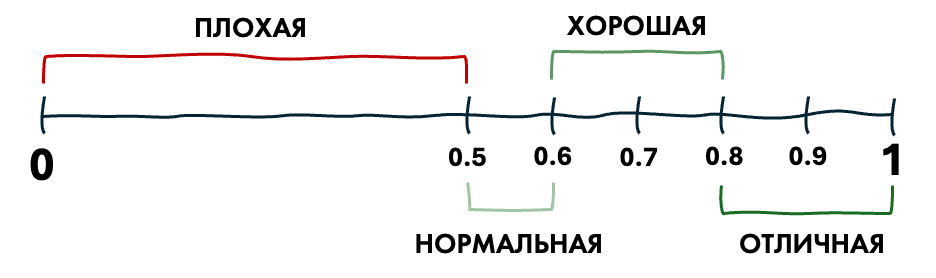

In [8]:
model.rsquared

0.556217490187467

У модели нормальное качество

#### Среднеквадратичная ошибка ($MSE$) и Среднеабсолютная ошибка ($MAE$)

Показывают ошибку модели:

- Меняются от 0 до +∞
- Чем ближе к 0, тем лучше
- Та модель лучше, у которой MSE или MAE меньше
- МSE одной модели, можно сравнивать только MSE другой
- МAE одной модели, можно сравнивать только MAE другой


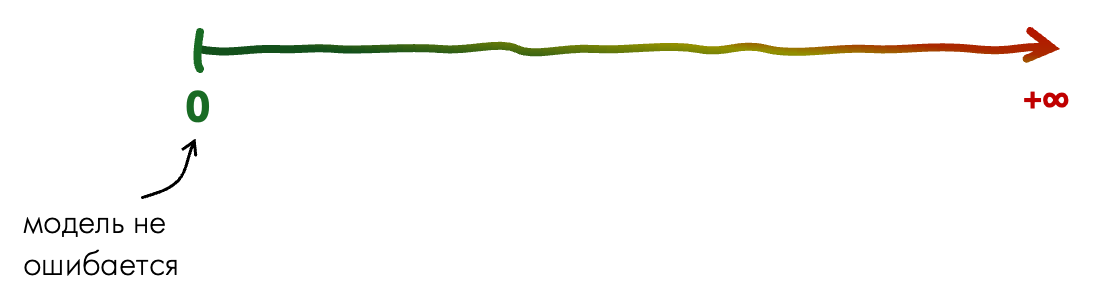

**Среднеквадратичная ошибка**:

$$ MSE = \frac{\Sigma(Y-\widehat{Y})^2}{n} $$

$\Sigma$ - знак суммы, другими словами $(Y_0 - \widehat{Y_0}) + (Y_1 - \widehat{Y_1}) + ... + (Y_n - \widehat{Y_n})$

$Y$ - фактические значения целевой переменной

$\widehat{Y}$ - предсказанные значения целевой переменной `модель.predict(предиктор/ы)`

$n$ - количество наблюдений

In [9]:
Y_pr = model.predict(X)
MSE = sum((Y-Y_pr)**2)/len(Y)
MSE

4793.57954397538

Модель ошибается, нужно сравнить MSE c другими модели, чтобы выбрать лучшую

**Среднеабсолютная ошибка**:

$$ MAE = \frac{\Sigma |Y-\widehat{Y}| }{n} $$

$\Sigma$ - знак суммы, другими словами $(Y_0 - \widehat{Y_0}) + (Y_1 - \widehat{Y_1}) + ... + (Y_n - \widehat{Y_n})$

$Y$ - фактические значения целевой переменной

$\widehat{Y}$ - предсказанные значения целевой переменной `модель.predict(предиктор/ы)`

$n$ - количество наблюдений

In [10]:
Y_pr = model.predict(X)
MAE = sum(abs(Y-Y_pr))/len(Y)
MAE

55.27903971062613

Модель ошибается, нужно сравнить MAE c другими модели, чтобы выбрать лучшую

### A11 (1)

Аналитик Анатолий построил модель, которая предсказывает количество обращений в техническую поддержку в зависимости от количества часов, прошедших с начала рабочего дня. На графике изображена получившаяся модель (синим) и реальные данные за первую половину текущего рабочего дня (красным). Выберите верное утверждение.

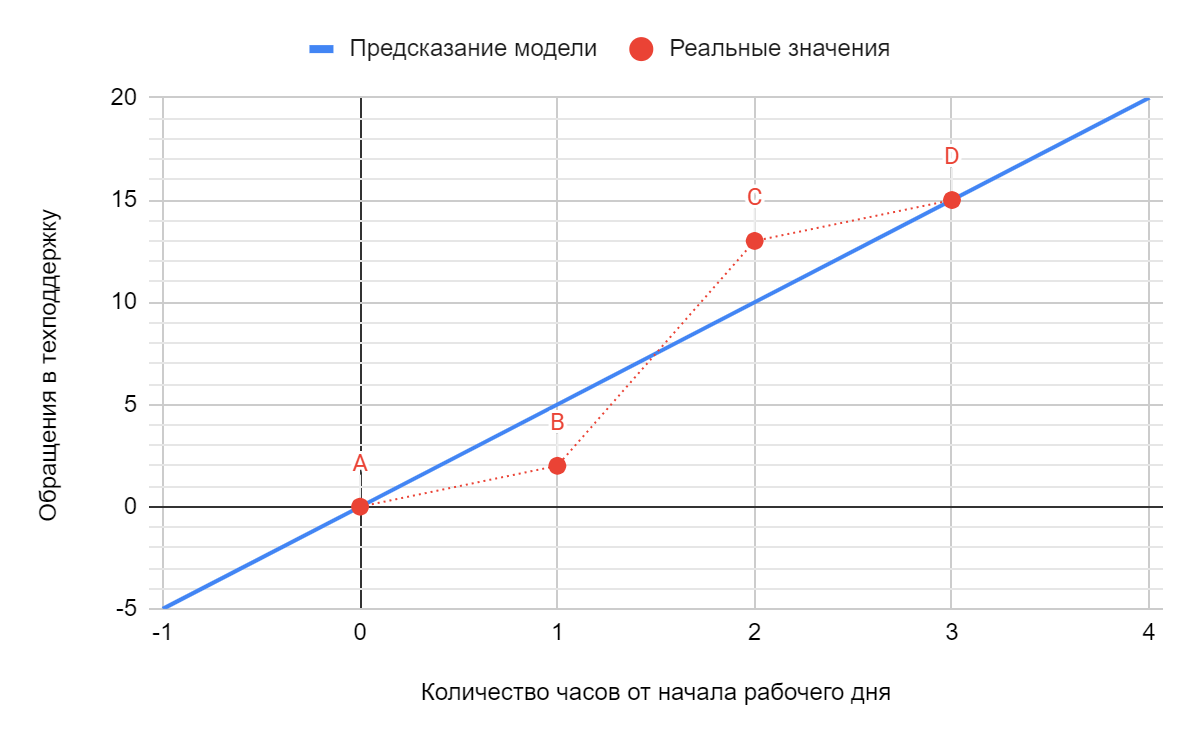

- Ошибка предсказания модели для 2 часов от начала рабочего дня меньше, чем для 0 часов от начала рабочего дня


- Среднеквадратичная ошибка равна 0


- Если просуммировать отклонения реальных значений от предсказания, получится 0


- Среднеквадратичная ошибка равна 6

In [11]:
  Р  П
A 0- 0 =0  0
B 2- 5=-3  9
C 13-10=3  9
D 15-15=0  0
СУММА   0  18
MSE        18/4 = 4.5

SyntaxError: invalid syntax (768937869.py, line 1)

### A11 (2)

Исследователь Георгий построил линейную регрессию по 150 наблюдениям. Выберите верное утверждение.


- Среднеквадратичная ошибка в модели Георгия может быть больше 100


- Среднеквадратичная ошибка в модели Георгия не может превышать 150


- Среднеквадратичная ошибка в модели Георгия обязательно больше нуля


- Среднеквадратичная ошибка в модели Георгия может быть отрицательной

### C8, С9

### Датасет 1

In [12]:
import pandas as pd
df = pd.read_csv('C:\скил\DST-156\IDE_NEW\Домашнее задание. Этап 1/train1_C.csv')
df.head()

,Car Name,Year,Region,FuelType,Mileage,Price,Owners
0,Ford Transit,2002,Goris,Diesel,215000,12000,4
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500,5
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000,5
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000,3
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500,6


Постройте модель линейной регрессии, которая показывает как пробег автомобиля (Mileage) оказывает влияние на стоимость автомобиля (Price). Укажите в качестве ответа произведение коэффициентов полученной регрессии. Ответ округлите до двух знаков.

$$ Price = w_0+w_1*Mileage $$

In [13]:
import statsmodels.api as sm

Y = df['Price']
X = sm.add_constant(df['Mileage'])
model = sm.OLS(Y, X).fit()
p = model.params
p

const      18109.868446
Mileage       -0.017451
dtype: float64

$$ Price = 18109-0.017*Mileage $$

In [14]:
round(p['const']*p['Mileage'], 2)

-316.04

- Если у автомобиля нет пробега, то цена такого автомобиля 18109
- Каждый км пробега уменьшает стоимость на 0.017

Постройте модель линейной регрессии, которая показывает как пробег автомобиля (Mileage) оказывает влияние на его стоимость (Price). Укажите в качестве ответа cреднеквадратичную ошибку (MSE) полученной регрессии. Ответ округлите до двух знаков.

Задание 7-1

Постройте модель линейной регрессии, которая показывает, как пробег автомобиля (Mileage) влияет на стоимость автомобиля (Price). В качестве ответа укажите произведение коэффициентов полученной регрессии. Ответ округлите до двух знаков. 

In [15]:
Q_7_1=p[0]*p[1]
round(Q_7_1,2)

C:\Users\molde\AppData\Local\Temp\ipykernel_67884\260729893.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q_7_1=p[0]*p[1]


-316.04

In [16]:
Y_pr = model.predict(X)
MSE = sum((Y-Y_pr)**2)/len(Y)
round(MSE, 2)

310794084.57

### Датасет 2

In [17]:
import pandas as pd
df = pd.read_csv('C:\скил\DST-156\IDE_NEW\Домашнее задание. Этап 1/train2_C.csv')
df.head()

,price,bedrooms,sqft_living,sqft_lot,waterfront,grade,yr_built,yr_renovated
0,221900.0,3,1180,5650,0,7,1955,0
1,538000.0,3,2570,7242,0,7,1951,1991
2,180000.0,2,770,10000,0,6,1933,0
3,604000.0,4,1960,5000,0,7,1965,0
4,510000.0,3,1680,8080,0,8,1987,0


Задание 7_2

Постройте модель линейной регрессии, которая показывает, как размер жилой площади (sqft_living) влияет на стоимость дома (price). В качестве ответа укажите коэффициент перед независимой переменной. Ответ округлите до двух знаков. 

Постройте модель линейной регрессии, которая показывает как размер жилой площади (sqft_living) оказывает влияние на стоимость дома (price). Укажите в качестве ответа коэффициент перед независимой переменной. Ответ округлите до двух знаков.

$$ price = w_0+w_1*\text{sqft_living} $$

Наблюдение: дом

In [18]:
import statsmodels.api as sm
Y = df['price']
X = sm.add_constant(df['sqft_living'])
model = sm.OLS(Y, X).fit()
round(model.params, 2)

const         -43580.74
sqft_living      280.62
dtype: float64

$$ price = -43580.74+280.62*\text{sqft_living} $$

- Свободныйй коэффициент интерпритровать нельзя, так как жилая площадь не может быть равна 0
- При увеличении жилой площади на 1 фут2, цена возрастате на $280.62

Постройте модель линейной регрессии, которая показывает как размер жилой площади (sqft_living) оказывает влияние на стоимость дома (price). Укажите в качестве ответа среднеквадратичную ошибку модели (MSE). Ответ округлите до двух знаков.

In [19]:
Y_pr = model.predict(X)
MSE = sum((Y-Y_pr)**2)/len(Y)
round(MSE, 2)

68351286833.04

### Датасет 3

In [20]:
import pandas as pd
df = pd.read_csv('C:\скил\DST-156\IDE_NEW\Домашнее задание. Этап 1/train3_C.csv')
df.head()

,data,public_transport_usage,pedestrian_count,temperature,humidity,public_transport_delay,weather_conditions,day_of_week,pedestrian_incidents
0,2023-01-01,288.333333,863.833333,12.704031,47.833333,14.647987,Rain,Sunday,46
1,2023-01-02,232.541667,830.333333,11.343628,63.666667,11.660099,Snow,Monday,40
2,2023-01-03,267.458333,891.125000,13.902640,57.125000,14.749126,Fog,Tuesday,54
3,2023-01-04,257.791667,876.625000,17.733302,58.791667,14.248311,"Clear, Fog, Snow",Wednesday,51
4,2023-01-05,281.083333,1036.291667,13.445025,54.916667,13.869797,"Fog, Rain",Thursday,54


Постройте модель линейной регрессии, которая показывает, как температура воздуха (temperature) влияет на количество ДТП с пешеходами (pedestrian_incidents). В качестве ответа укажите значение свободного коэффициента. Ответ округлите до двух знаков.

Постройте модель линейной регрессии, которая показывает как температура воздуха (temperature) оказывает влияние на количество ДТП с пешеходами (pedestrian_incidents). Укажите в качестве ответа среднюю абсолютную ошибку (MAE) модели. Ответ округлите до двух знаков.

### Датасет 4

In [21]:
import pandas as pd
df = pd.read_csv('C:\скил\DST-156\IDE_NEW\Домашнее задание. Этап 1/train4_C.csv')
df.head()

,song_name,album_name,track_number,popularity,danceability,energy,loudness,mode,instrumentalness,valence,tempo
0,Tom Sawyer,Moving Pictures (40th Anniversary Super Deluxe),1,31,0.526,0.881,-7.447,0,0.005770,0.655,87.392
1,Red Barchetta,Moving Pictures (40th Anniversary Super Deluxe),2,28,0.530,0.933,-7.377,1,0.000081,0.348,144.143
2,YYZ,Moving Pictures (40th Anniversary Super Deluxe),3,28,0.504,0.909,-8.101,1,0.842000,0.402,140.854
3,Limelight,Moving Pictures (40th Anniversary Super Deluxe),4,29,0.573,0.878,-7.990,0,0.000281,0.842,131.005
4,The Camera Eye,Moving Pictures (40th Anniversary Super Deluxe),5,26,0.356,0.793,-8.495,1,0.398000,0.149,165.004


Постройте модель линейной регрессии, которая показывает как танцевальность трека (danceability) оказывает влияние на его популярность (popularity). Укажите в качестве ответа модуль разности между полученными коэффициентами регрессии. Ответ округлите до двух знаков.

Постройте модель линейной регрессии, которая показывает как танцевальность трека (danceability) оказывает влияние на его популярность (popularity). Укажите в качестве ответа коэффициент детерминации (R2) модели. Ответ округлите до двух знаков.

### Датасет 5

In [22]:
import pandas as pd
df = pd.read_csv('C:\скил\DST-156\IDE_NEW\Домашнее задание. Этап 1/train5_C.csv')
df.head()

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,TotalSlope,NightSki,TotalLifts,LiftCapacity
0,Alpendorf (Ski amedé),Austria,1980,740,52,115,No,49,75398
1,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,210,Yes,72,99017
2,Oberau (Wildschönau),Austria,1130,900,30,2,No,2,1932
3,Dachstein West,Austria,1620,780,42,51,Yes,36,32938
4,Rosa Khutor,Southern Russia,2320,940,22,77,No,27,49228


Постройте модель линейной регрессии, которая показывает как количество трасс на горнолыжном курорте (TotalSlope) оказывает влияние на стоимость билета на подъемник (DayPassPriceAdult). Укажите в качестве ответа значение коэффициента перед независимой переменной. Ответ округлите до двух знаков.

Постройте модель линейной регрессии, которая показывает как количество трасс на горнолыжном курорте (TotalSlope) оказывает влияние на стоимость билета на подъемник (DayPassPriceAdult). Укажите в качестве ответа среднюю абсолютную ошибку (MAE) модели. Ответ округлите до двух знаков.

### A11

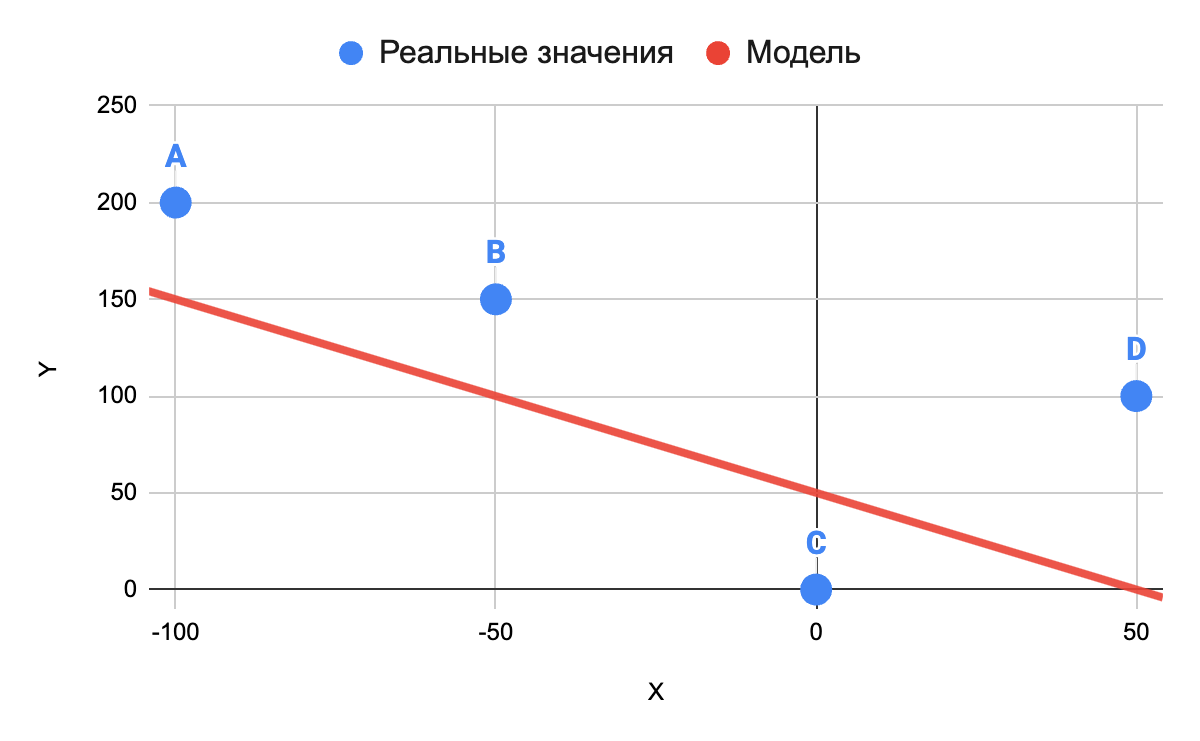

In [23]:
df = pd.DataFrame()

In [24]:
MAE = sum(abs(df['Р']-df['П']))/4
round(MAE, 2)

KeyError: 'Р'

### A12

In [ ]:
200 + 40*20 + 50*0

1000

In [ ]:
200-150=50
150-100 =50


SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (1473854670.py, line 1)